# MIC

최대 정보 상관계수(Maximal Information Coefficient)
- https://datascienceschool.net/02%20mathematics/10.04%20%EC%83%81%ED%98%B8%EC%A0%95%EB%B3%B4%EB%9F%89.html

## 쿨벡-라이블러 발산
변수 $X$, $Y$의 확률 분포 $p(x)$, $p(y)$에 대하여 두 확률 분포의 유사성을 확인한다. 같으면 0, 다를 수록 큰 값을 가진다.  
$KL(p||q)=\sum_{i=1}^K p(y_i) \log_2 \left( \frac {p(y_i)}{q(y_i)} \right)$


## 상호정보량
결합확률밀도함수 $p(x, y)$와 주변확률밀도함수의 곱 $p(x)p(y)$의 쿨벡-라이블러 발산. 서로 독립이면 $p(x,y)=p(x)p(y)$이기 때문에 상호정보량은 0이 되며 반대로 상관관계가 있다면 값이 커지게 된다.  
$MI[X, Y] = KL \left( p(x, y) || p(x)p(y) \right) = \sum_{i=1}^K p(x_i, y_i) \log _2 \left( \frac {p(x_i, y_i)}{p(x_i)p(y_i)} \right)$

## 최대 정보 상관계수
1. 연속확률변수의 표본 데이터에서 상호정보량을 측정하려면 확률분포함수를 알아야 함
2. 히스토그램을 사용하여 유한 개의 구간(bin)으로 나누어 추정
    - 이 때 구간의 갯수나 경계 위치에 따라 추정오차가 커질 수 있음
3. 구간을 나누는 방법을 다양하게 시도하여 구한 상호정보량 중 가장 큰 값을 선택하여 정규화

## `minepy`
- https://minepy.readthedocs.io/en/latest/python.html

C:\Users\dongwha\AppData\Local\Temp\ipykernel_4364\1635001580.py:65: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  np.array([-1, 1])[rs.random_integers(0, 1, size=n)]


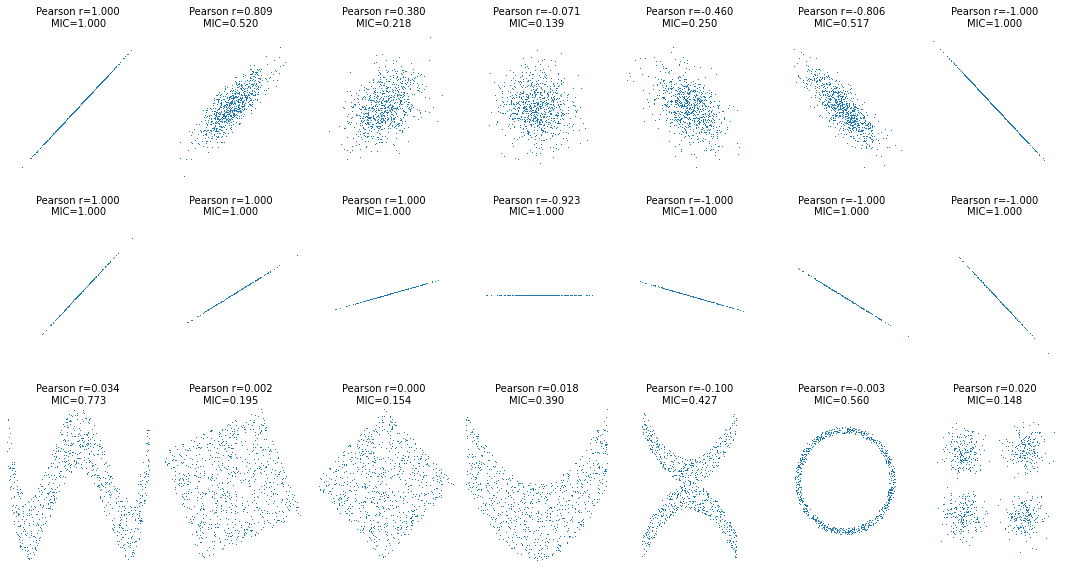

In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE


rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.corrcoef(x, y)[0, 1]
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = mine.mic()
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.3f\nMIC=%.3f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize=(15, 8))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()